In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: inline


In [68]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1) # passes input to layer 1
        self.fc2 = nn.Linear(h1, h2) # passes layer 1 to layer 2
        self.out = nn.Linear(h2, out_features) # passes layer 2 to output

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [69]:
# Set manual seed for randomizing
torch.manual_seed(41)
# Instantiate model
model = Model()

In [70]:
# Import the dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [71]:
# Change last column from strings to floats 
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)


C:\Users\Akhil Kaza\AppData\Local\Temp\ipykernel_17544\3245574092.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [72]:
# set x and y parameters
x = df.drop('variety', axis=1)
y = df['variety']


In [73]:
# Convert x and y to numpy arrays
x = x.values
y = y.values

In [74]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [75]:
# Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [76]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [77]:
# Measure error
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.015)

In [78]:
# Train model
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x_train)  # Send data forward to recieve predicted results

    # Measure loss
    loss = criterion(y_pred, y_train)  # Loss is determined by difference of predicted and trained values
    losses.append(loss.item())  # Convert loss to a Python float and append to list

    # Print every 10 epochs
    if i % 10 == 0:
        print(f"Epoch count: {i} loss: {loss.item()}")

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch count: 0 loss: 1.125203251838684
Epoch count: 10 loss: 0.9437038898468018
Epoch count: 20 loss: 0.63343346118927
Epoch count: 30 loss: 0.37502792477607727
Epoch count: 40 loss: 0.2133186161518097
Epoch count: 50 loss: 0.12241627275943756
Epoch count: 60 loss: 0.07393458485603333
Epoch count: 70 loss: 0.051334574818611145
Epoch count: 80 loss: 0.04033062979578972
Epoch count: 90 loss: 0.034231483936309814


Text(0.5, 0, 'Epoch')

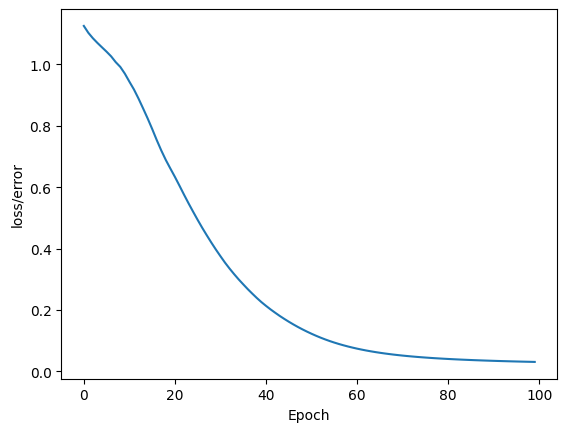

In [79]:
# Visualise results
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [80]:
# Evaluate model on test data set
with torch.no_grad(): # Turn off back propogation
    y_eval = model.forward(x_test)
    loss = criterion(y_eval, y_test) # find error
    print(loss)

tensor(0.1346)


In [81]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Find out what flower class the model thinks it is
    print(f"{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # If it is correct
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"{correct} correct!")

1.)  tensor([-7.9321,  5.2440,  8.2513]) 	 2 	 2
2.)  tensor([-10.3401,   4.4070,  13.0136]) 	 2 	 2
3.)  tensor([-11.4719,   5.6473,  13.4399]) 	 2 	 2
4.)  tensor([-5.6868,  7.3803,  2.3396]) 	 1 	 1
5.)  tensor([-9.7519,  5.5598, 10.8024]) 	 2 	 2
6.)  tensor([-4.5171,  6.6775,  1.2174]) 	 1 	 1
7.)  tensor([-7.9692,  6.0035,  7.4659]) 	 2 	 2
8.)  tensor([-5.6402,  7.4987,  2.1371]) 	 1 	 1
9.)  tensor([-8.8487,  5.7834,  9.1173]) 	 2 	 2
10.)  tensor([-11.0364,   4.6700,  13.8406]) 	 2 	 2
11.)  tensor([-7.6498,  6.0271,  6.9466]) 	 2 	 2
12.)  tensor([ 5.4352, -2.8564, -3.6109]) 	 0 	 0
13.)  tensor([ 5.0739, -2.5647, -3.3925]) 	 0 	 0
14.)  tensor([-2.8352,  5.0030,  0.4097]) 	 1 	 1
15.)  tensor([ 4.1402, -1.5982, -3.0877]) 	 0 	 0
16.)  tensor([-7.3135,  6.3519,  6.0659]) 	 2 	 1
17.)  tensor([ 4.7970, -2.2679, -3.3146]) 	 0 	 0
18.)  tensor([-7.8500,  5.4923,  7.8642]) 	 1 	 2
19.)  tensor([ 6.0387, -3.4559, -3.8387]) 	 0 	 0
20.)  tensor([ 4.0467, -1.5672, -2.9769]) 	 0 	 0


In [82]:
# Create new sample data
new_iris = torch.tensor([4.9, 3.0, 1.4, 0.2])

In [ ]:
# Feed new sample data
with torch.no_grad():
  pred_tensor = (model(new_iris))
  pred_index = torch.argmax(pred_tensor)

# Derive prediction based on largeu value's index within pred_tensor
if pred_index == 0:
  pred_iris = "Setosa"

elif pred_index == 1:
  pred_iris = "Versicolor"

else:
  pred_iris = "Virginica"

print(f"Predicted flower: {pred_iris}")
print(pred_tensor) # Check if the predicted value is correct according to pred tensor

Predicted flower: Setosa
tensor([ 5.0861, -2.5376, -3.4450])
